# various access sizes, cache cleared

## <font color="orange"> Process for experiments </font>

1. Cube sizes from $2^6$ to $2^{30}$, starting from biggest. Expressed as Cube Root

2. Read 4GB of data from different variable to make sure cache is clear

3. Pick a random starting point.

4. Read a cube from this starting point (see #1). Cube not guaranteed to be in single chunk

In [1]:
import zarr # Check version
import numpy as np
from matplotlib import pyplot as plt
from random import randint

zarr.__version__

'2.13.2'

In [2]:
chunk_sizes = [ 2**i for i in range(6,30)]

In [3]:
cube_root_size = [int(x ** (1. / 3)) for x in chunk_sizes]
cube_root_size[:5]

[3, 5, 6, 7, 10]

In [4]:
ncar_data = zarr.open("sciserver-experimental/ariel/tests")
ncar_data.info

Name,/
Type,zarr.hierarchy.Group
Read-only,False
Store type,zarr.storage.DirectoryStore
No. members,6
No. arrays,6
No. groups,0
Arrays,"e, p, t, u, v, w"


# Compressed
## Cold-cache access all chunk sizes 2^6 - 2^30

In [52]:
ncar_data['e'].info

Name,/e
Type,zarr.core.Array
Data type,float32
Shape,"(2048, 2048, 2048)"
Chunk shape,"(256, 256, 256)"
Order,C
Read-only,False
Compressor,"Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)"
Store type,zarr.storage.DirectoryStore
No. bytes,34359738368 (32.0G)
No. bytes stored,13989514907 (13.0G)


In [143]:
# Energy - 2.5 Compression Ratio
for i in range(len(cube_root_size)-1,-1,-1): # From 31st to 0-th (inclusive)
#     _ = ncar_uncompressed['w'][0:1024,0:1024,0:1024]
    _ = ncar_uncompressed['t'][0:2048,0:2048,0:2048]
    print(cube_root_size[i])
    
    random_start_point = 64 * randint(0, 16)
    %timeit -o -n 1 -r 1 ncar_data['e'][random_start_point:cube_root_size[i] + random_start_point,random_start_point:cube_root_size[i] + random_start_point,random_start_point:cube_root_size[i] + random_start_point]

812
18.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
645
16.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
511
7.66 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
406
14.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
322
14.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
255
2.68 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
203
1.98 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
161
1.41 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
127
504 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
101
1.32 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
80
486 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
63
96.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
50
469 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
40
442 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
31
380 ms ± 0 ns per loop (mean ± std. dev. of 1 ru

Spikes up/down in time are when access happens between chunks. Cross-chunk access needs decompressing of both chunks

In [84]:
ccc_e_times = [24900, 13200, 3080, 4080, 1280, 728, 1150, 982, 131, 175, 848, 97.6, 92, 118, 148, 115, 117, 123, 20.8, 110, 94.8, 103, 122, 190]
# 2nd run = [24200, 9100, 3930, 3420, 1080, 348, 1290, 1410, 111, 827, 110, 109, 136, 112, 129, 100, 127, 94.7, 102, 97.2, 90.9, 79.9, 112, 104]
# 2048-run = [18300, 16300, 7660, 14300, 14100, 2680, 1980, 1410, 504, 1320, 486, 96.9, 469, 442, 380, 465, 232, 470, 242, 473, 421, 485, 454, 371]
ccc_e_times.reverse()

In [56]:
ncar_data['w'].info

Name,/w
Type,zarr.core.Array
Data type,float32
Shape,"(2048, 2048, 2048)"
Chunk shape,"(256, 256, 256)"
Order,C
Read-only,False
Compressor,"Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)"
Store type,zarr.storage.DirectoryStore
No. bytes,34359738368 (32.0G)
No. bytes stored,27329309819 (25.5G)


In [144]:
# w velocity field
# Cross-chunk
for i in range(len(cube_root_size)-1,-1,-1): # From 31st to 0-th (inclusive)
#     _ = ncar_uncompressed['w'][0:1024,0:1024,0:1024]
    _ = ncar_uncompressed['e'][0:2048,0:2048,0:2048]
#     print(cube_root_size[i])
    
    random_start_point = 64 * randint(0, 16)
    %timeit -o -n 1 -r 1 ncar_data['w'][random_start_point:cube_root_size[i] + random_start_point,random_start_point:cube_root_size[i] + random_start_point,random_start_point:cube_root_size[i] + random_start_point]

52.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
20.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
4.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
3.21 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
3.04 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
3.09 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
573 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
399 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
497 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
559 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
862 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
450 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
457 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
332 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
380 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
372 ms ± 0 ns per loop (mean ± std. dev. 

In [83]:
# ccc = Cross-chunk compressed
ccc_w_times = [31500, 54900, 9540, 9010, 2630, 2130, 2840, 2150, 2170, 322, 577, 693, 418, 341, 690, 276, 523, 401, 445, 338, 516, 385, 477, 483]
# 2nd run = [22100, 10100, 7460, 3010, 1200, 276, 1270, 268, 1280, 99.9, 111, 140, 127, 100, 115, 171, 121, 89.6, 191, 122, 138, 143, 116, 148]
# 2048-run = [52200, 20700, 4500, 3210, 3040, 3090, 573, 399, 497, 559, 862, 450, 457, 332, 380, 372, 433, 503, 412, 643, 502, 428, 458, 563]
ccc_w_times.reverse()

In [57]:
ncar_data['t'].info

Name,/t
Type,zarr.core.Array
Data type,float32
Shape,"(2048, 2048, 2048)"
Chunk shape,"(256, 256, 256)"
Order,C
Read-only,False
Compressor,"Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)"
Store type,zarr.storage.DirectoryStore
No. bytes,34359738368 (32.0G)
No. bytes stored,19025554335 (17.7G)


In [145]:
# Temperature
for i in range(len(cube_root_size)-1,-1,-1): # From 31st to 0-th (inclusive)
#     _ = ncar_uncompressed['w'][0:1024,0:1024,0:1024]
    _ = ncar_uncompressed['w'][0:2048,0:2048,0:2048]
#     print(cube_root_size[i])
    
    random_start_point = 64 * randint(0, 16)
    %timeit -o -n 1 -r 1 ncar_data['t'][random_start_point:cube_root_size[i] + random_start_point,random_start_point:cube_root_size[i] + random_start_point,random_start_point:cube_root_size[i] + random_start_point]

45.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
10.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
7.21 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
3.09 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
2.24 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
2.01 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
2.13 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.59 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
698 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
413 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
316 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
484 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
564 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
311 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
359 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
315 ms ± 0 ns per loop (mean ± std. dev.

I think outliers (too fast) in 2nd run are by chance if random starting point is the same for both?

In [85]:
ccc_t_times = [48300, 18600, 3840, 3520, 2120, 1510, 2070, 414, 242, 184, 302, 230, 290, 301, 425, 294, 273, 248, 227, 286, 170, 234, 257, 266]
# These runs were not sequential. Other cells were run in between

# 2nd run = [26100, 8320, 2610, 1590, 1450, 976, 833, 779, 85.9, 1950, 89.6, 83, 78.6, 104, 110, 103, 74, 89, 87.3, 112, 79.6, 84, 89.2, 134]
# 2048-run = [45500, 10600, 7210, 3090, 2240, 2010, 2130, 1590, 698, 413, 316, 484, 564, 311, 359, 315, 275, 398, 282, 391, 352, 352, 290, 265]
ccc_t_times.reverse()

# Uncompressed
## Cold-cache access all chunk sizes 2^6 - 2^30

In [18]:
ncar_uncompressed = zarr.open("ncar_zarr_uncompressed")
ncar_uncompressed.info

Name,/
Type,zarr.hierarchy.Group
Read-only,False
Store type,zarr.storage.DirectoryStore
No. members,3
No. arrays,3
No. groups,0
Arrays,"e, t, w"


In [61]:
ncar_uncompressed['e'].info

Name,/e
Type,zarr.core.Array
Data type,float32
Shape,"(2048, 2048, 2048)"
Chunk shape,"(256, 256, 256)"
Order,C
Read-only,False
Compressor,None
Store type,zarr.storage.DirectoryStore
No. bytes,34359738368 (32.0G)
No. bytes stored,34359738622 (32.0G)


In [146]:
# Energy field
for i in range(len(cube_root_size)-1,-1,-1): # From 31st to 0-th (inclusive)
#     _ = ncar_uncompressed['w'][0:1024,0:1024,0:1024]
    _ = ncar_uncompressed['t'][0:2048,0:2048,0:2048]
    print(cube_root_size[i])
    
    random_start_point = 64 * randint(0, 16)
    %timeit -o -n 1 -r 1 ncar_uncompressed['e'][random_start_point:cube_root_size[i] + random_start_point,random_start_point:cube_root_size[i] + random_start_point,random_start_point:cube_root_size[i] + random_start_point]

812
39.8 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
645
30 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
511
13.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
406
8.37 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
322
9.68 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
255
572 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
203
2.32 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
161
402 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
127
369 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
101
2.23 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
80
321 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
63
335 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
50
311 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
40
353 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
31
379 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 

In [86]:
# ccu - cross-chunk uncompressed
ccu_e_times = [64000, 23600, 15500, 44800,3960,3210, 2690, 3960,324,509, 235, 483, 569, 654, 567, 789, 473, 1270, 410, 650, 322, 570, 852]

ccu_e_times.reverse()
# 2nd run = [31200, 13200, 5420, 4480, 1330, 1490, 281, 1180, 163, 127, 141, 281, 1180, 163, 127, 141, 281, 143, 131, 134, 144, 129, 138, 206, 137, 220, 157, 132, 177]
# 2048-time = [39800, 30000, 13500, 8370, 9680, 572, 2320, 402, 369, 2230, 321, 335, 311, 353, 379, 465, 343, 364, 287, 319, 298, 301, 359, 355]

In [62]:
ncar_uncompressed['w'].info

Name,/w
Type,zarr.core.Array
Data type,float32
Shape,"(2048, 2048, 2048)"
Chunk shape,"(256, 256, 256)"
Order,C
Read-only,False
Compressor,None
Store type,zarr.storage.DirectoryStore
No. bytes,34359738368 (32.0G)
No. bytes stored,34359738622 (32.0G)


In [147]:
# w velocity field
for i in range(len(cube_root_size)-1,-1,-1): # From 31st to 0-th (inclusive)
#     _ = ncar_uncompressed['w'][0:1024,0:1024,0:1024]
    _ = ncar_uncompressed['e'][0:2048,0:2048,0:2048]
    print(cube_root_size[i])
    
    random_start_point = 64 * randint(0, 16)
    %timeit -o -n 1 -r 1 ncar_uncompressed['w'][random_start_point:cube_root_size[i] + random_start_point,random_start_point:cube_root_size[i] + random_start_point,random_start_point:cube_root_size[i] + random_start_point]

812
37.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
645
29.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
511
9.74 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
406
11.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
322
2.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
255
2.18 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
203
2.24 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
161
382 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
127
349 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
101
2.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
80
409 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
63
290 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
50
363 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
40
321 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
31
259 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 

In [87]:
ccu_w_times = [59900, 18500, 16700, 17200, 3450, 4390, 4280, 800, 724, 864, 480, 696, 605, 2120, 700, 677, 591, 489, 445, 372, 542, 727, 859, 429]
ccu_w_times.reverse()
# 2nd run = [21600, 9180, 2530, 4430, 1470, 1170, 1200, 148, 131, 1100, 939, 126, 212, 138, 135, 123, 173, 158, 123, 155, 167, 133, 183, 133]
# 2048-time = [37400, 29400, 9740, 11200, 2900, 2180, 2240, 382, 349, 2100, 409, 290, 363, 321, 259, 315, 363, 294, 387, 379, 323, 318, 317, 311]

In [63]:
ncar_uncompressed['t'].info

Name,/t
Type,zarr.core.Array
Data type,float32
Shape,"(2048, 2048, 2048)"
Chunk shape,"(256, 256, 256)"
Order,C
Read-only,False
Compressor,None
Store type,zarr.storage.DirectoryStore
No. bytes,34359738368 (32.0G)
No. bytes stored,34359738622 (32.0G)


In [148]:
# temperature field
for i in range(len(cube_root_size)-1,-1,-1): # From 31st to 0-th (inclusive)
#     _ = ncar_uncompressed['w'][0:1024,0:1024,0:1024]
    _ = ncar_uncompressed['e'][0:2048,0:2048,0:2048]
    print(cube_root_size[i])
    
    random_start_point = 64 * randint(0, 16)
    %timeit -o -n 1 -r 1 ncar_uncompressed['t'][random_start_point:cube_root_size[i] + random_start_point,random_start_point:cube_root_size[i] + random_start_point,random_start_point:cube_root_size[i] + random_start_point]

812
31.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
645
12.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
511
11.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
406
9.84 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
322
2.8 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
255
2.45 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
203
2.28 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
161
2.16 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
127
339 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
101
2.46 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
80
373 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
63
354 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
50
366 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
40
326 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
31
353 ms ± 0 ns per loop (mean ± std. dev. of 1 run,

In [88]:
ccu_t_times = [84000, 17300, 19900, 13500, 10400, 7390, 878, 480, 2870, 698, 316, 364, 373, 395, 987, 992, 412, 390, 340, 528, 430, 444, 490, 374]
# 2048-time = [31200, 12300, 11300, 9840, 2800, 2450, 2280, 2160, 339, 2460, 373, 354, 366, 326, 353, 354, 349, 359, 301, 368, 308, 333, 322, 346]
ccu_t_times.reverse()

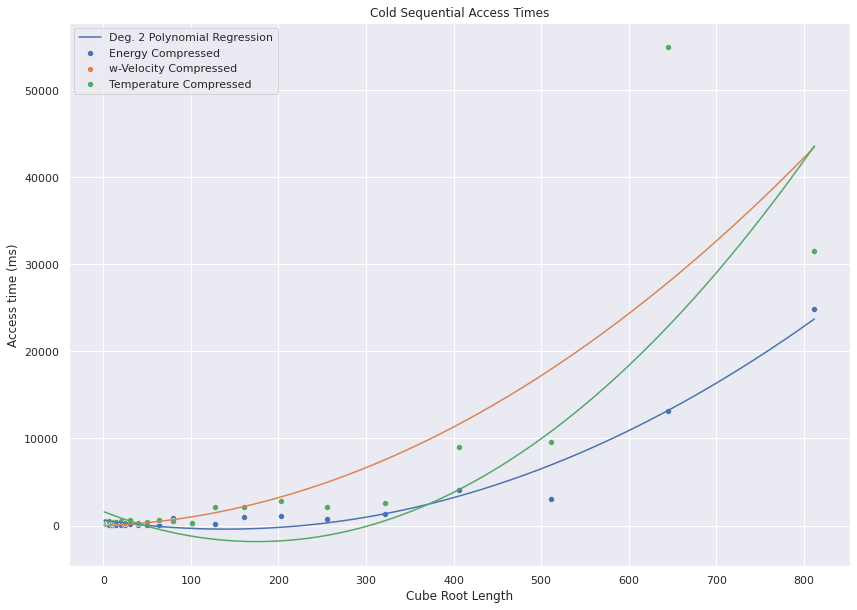

In [104]:
import seaborn as sns
sns.set(rc={'figure.figsize':(14,10)})

# Energy compressed
ax = sns.scatterplot(x=cube_root_size, y=ccc_e_times, label="Energy Compressed").set(xlabel='Cube Root Length', ylabel='Access time (ms)')
#ax.set(xlabel='Cube Root Length', ylabel='Access time (ms)')

# https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
mymodel = np.poly1d(np.polyfit(cube_root_size, ccc_e_times, 2))
myline = np.linspace(1, cube_root_size[len(cube_root_size)-1], 1000)
plt.plot(myline, mymodel(myline), label="Deg. 2 Polynomial Regression")#, color="orange")

# w-velocity compressed
ax = sns.scatterplot(x=cube_root_size, y=ccc_w_times, label="w-Velocity Compressed")

mymodel_w = np.poly1d(np.polyfit(cube_root_size, ccc_w_times, 2))
myline_w = np.linspace(1, cube_root_size[len(cube_root_size)-1], 1000)
plt.plot(myline_w, mymodel_w(myline_w))


# Temperature compressed
ax = sns.scatterplot(x=cube_root_size, y=ccc_w_times, label="Temperature Compressed")

mymodel_t = np.poly1d(np.polyfit(cube_root_size, ccc_t_times, 2))
myline_t = np.linspace(1, cube_root_size[len(cube_root_size)-1], 1000)
plt.plot(myline_t, mymodel_t(myline_t))


plt.title("Cold Sequential Access Times")
plt.show()

In [106]:
access_sizes_log = [i for i in range(6,30)]

Log-Linear scale looks horrible with regression line - don't show it here

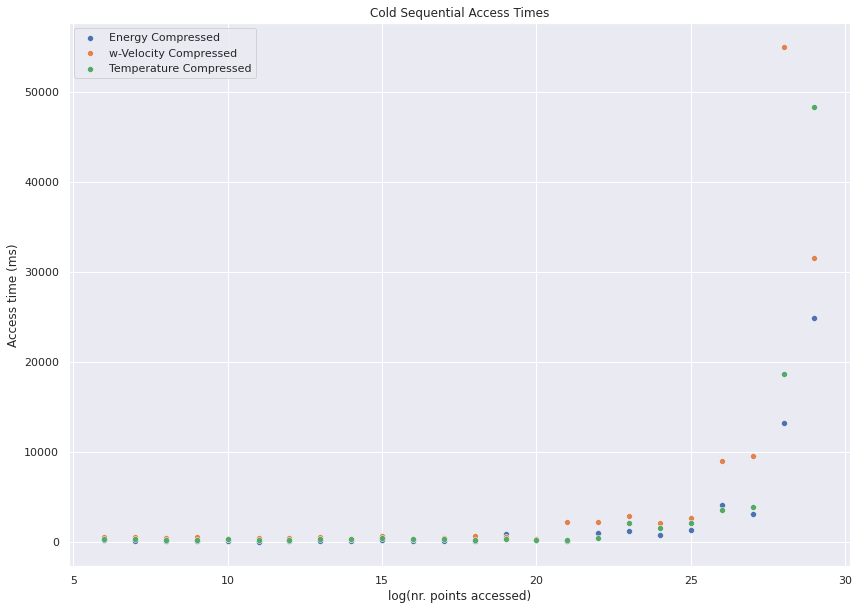

In [117]:
import seaborn as sns
sns.set(rc={'figure.figsize':(14,10)})

# Energy compressed
ax = sns.scatterplot(x=access_sizes_log, y=ccc_e_times, label="Energy Compressed").set(xlabel='log(nr. points accessed)', ylabel='Access time (ms)')
#ax.set(xlabel='Cube Root Length', ylabel='Access time (ms)')

# https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
# mymodel = np.poly1d(np.polyfit(access_sizes_log, ccc_e_times, 2))
# myline = np.linspace(1, access_sizes_log[len(access_sizes_log)-1], 1000)
# plt.plot(myline, mymodel(myline))#, color="orange")

# w-velocity compressed
ax = sns.scatterplot(x=access_sizes_log, y=ccc_w_times, label="w-Velocity Compressed")

# mymodel_w = np.poly1d(np.polyfit(access_sizes_log, ccc_w_times, 2))
# myline_w = np.linspace(1, access_sizes_log[len(access_sizes_log)-1], 1000)
# plt.plot(myline_w, mymodel_w(myline_w))


# Temperature compressed
ax = sns.scatterplot(x=access_sizes_log, y=ccc_t_times, label="Temperature Compressed")

# mymodel_t = np.poly1d(np.polyfit(access_sizes_log, ccc_t_times, 2))
# myline_t = np.linspace(1, access_sizes_log[len(access_sizes_log)-1], 1000)
# plt.plot(myline_t, mymodel_t(myline_t))


plt.title("Cold Sequential Access Times")
plt.show()

# Cold - Minimizing nr. chunks hit

<font color="orange">In above, random initialization means the number of chunks accessed at each run is non-deterministic</font>

Below, I run experiments starting always from the first point (0,0,0) in a randomly chosen chunk

# Compressed

In [16]:
chunk_size = 256

In [ ]:
# Energy field
for i in range(len(cube_root_size)-1,-1,-1): # From 31st to 0-th (inclusive)
#     _ = ncar_uncompressed['w'][0:1024,0:1024,0:1024]
    _ = ncar_uncompressed['t'][0:2048,0:2048,0:2048]
    print(cube_root_size[i])
    
    random_start_point = chunk_size * randint(0, 4)
    %timeit -o -n 1 -r 1 ncar_data['e'][random_start_point:cube_root_size[i] + random_start_point,random_start_point:cube_root_size[i] + random_start_point,random_start_point:cube_root_size[i] + random_start_point]

In [48]:
# MCU - Minimum chunk uncompressed. See above what Minimum chunk means
# mcc_e = [37900, 13900, 2480, 1850, 1450, 303, 297, 187, 142, 192, 146, 131, 215, 147, 145, 155, 224, 167, 206, 144, 117, 138, 157, 142]

# 2048^3 used in-between %timeit to clear cache. Should be more accurate than 1024^3. Former is 32GB. Latter 4GB
mcc_e = [[27600, 7370, 5980, 1650, 1550, 415, 422, 388, 129, 484, 309, 127, 433, 377, 487, 315, 454, 332, 387, 114, 435, 335, 311, 201]
         , [20100, 6200, 3200, 1990, 1090, 754, 215, 361, 382, 416, 351, 144, 84.5, 305, 71.5, 85.6, 498, 128, 329, 409, 600, 276, 287, 192]]

# mcc_e.reverse()
[i.reverse() for i in mcc_e]
mcc_e = np.array(mcc_e)

In [ ]:
# w velocity field
for i in range(len(cube_root_size)-1,-1,-1): # From 31st to 0-th (inclusive)
#     _ = ncar_uncompressed['w'][0:1024,0:1024,0:1024]
    _ = ncar_uncompressed['e'][0:2048,0:2048,0:2048]
    print(cube_root_size[i])
    
    random_start_point = chunk_size * randint(0, 4)
    %timeit -o -n 1 -r 1 ncar_data['w'][random_start_point:cube_root_size[i] + random_start_point,random_start_point:cube_root_size[i] + random_start_point,random_start_point:cube_root_size[i] + random_start_point]

In [47]:
# Results with 1024^3 (4GB) accessed between timeits for cache clearing
# mcc_w = [44000, 11900, 4250, 3790, 2780, 342, 273, 218, 188, 182, 223, 148, 167, 154, 160, 145, 149, 170, 152, 216, 164, 139, 179, 164]

# Results with 2048^3 (32GB) accessed between timeits for cache clearing
mcc_w = [[56900, 21500, 3850, 6060, 3090, 600, 586, 420, 383, 499, 370, 382, 389, 470, 339, 443, 366, 385, 351, 500, 481, 298, 330, 335]
         , [35700, 15300, 3580, 4420, 2860, 644, 581, 480, 497, 458, 626, 499, 462, 306, 405, 358, 452, 489, 434, 369, 598, 333, 473, 686]]

# mcc_w.reverse()
[i.reverse() for i in mcc_w]
mcc_w = np.array(mcc_w)

In [23]:
np.array(cube_root_size)

array([  3,   5,   6,   7,  10,  12,  15,  20,  25,  31,  40,  50,  63,
        80, 101, 127, 161, 203, 255, 322, 406, 511, 645, 812])

In [ ]:
# temperature field
for i in range(len(cube_root_size)-1,-1,-1): # From 31st to 0-th (inclusive)
# for i in range(6,-1,-1):
#     _ = ncar_uncompressed['w'][0:1024,0:1024,0:1024]
    _ = ncar_uncompressed['w'][0:2048,0:2048,0:2048]
    print(cube_root_size[i])
    
    random_start_point = chunk_size * randint(0, 4)
    %timeit -o -n 1 -r 1 ncar_data['t'][random_start_point:cube_root_size[i] + random_start_point,random_start_point:cube_root_size[i] + random_start_point,random_start_point:cube_root_size[i] + random_start_point]

In [46]:
# Results with 1024^3 (4GB) accessed between timeits for cache clearing
# mcc_t = [30300, 7740, 2550, 1850, 1630, 307, 263, 164, 161, 151, 142, 157, 139, 144, 139, 131, 202, 137, 159, 140, 194, 154, 154, 152]

# Results with 2048^3 (32GB) accessed between timeits for cache clearing
mcc_t = [[41600, 16200, 4700, 3230, 2720, 575, 429, 249, 337, 370, 340, 294, 416, 334, 255, 224, 184, 290, 167, 171, 315, 630, 235, 283]
         , [26600, 10900, 6080, 2200, 2300, 559, 475, 250, 273, 343, 272, 291, 285, 159, 298, 302, 233, 294, 321, 282, 261, 286, 362, 273]]
# 2048 3rd run = [84000, 13400, 7080, 2940, 2140, 489, 420, 422, 433, 321, 387, 333, 236, 411, 349, 387, 262, 385]

# mcc_t.reverse()
[i.reverse() for i in mcc_t]
mcc_t = np.array(mcc_t)

## Uncompressed

In [19]:
# Energy field
for i in range(len(cube_root_size)-1,-1,-1): # From 31st to 0-th (inclusive)
#     _ = ncar_uncompressed['w'][0:1024,0:1024,0:1024]
    _ = ncar_uncompressed['t'][0:2048,0:2048,0:2048]
    print(cube_root_size[i])
    
    random_start_point = chunk_size * randint(0, 4)
    %timeit -o -n 1 -r 1 ncar_uncompressed['e'][random_start_point:cube_root_size[i] + random_start_point,random_start_point:cube_root_size[i] + random_start_point,random_start_point:cube_root_size[i] + random_start_point]

3
475 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<TimeitResult : 475 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>

In [43]:
# MCC - min nr. chunks accessed per nr. points. MCC = min chunk compressed
# Results with 1024^3 (4GB) accessed between timeits for cache clearing
# mcu_e = [36400, 8070, 2660, 1880, 1510, 761, 300, 186, 241, 173, 162, 164, 154, 385, 166, 189, 200, 163, 146, 210, 175, 314, 180, 167]

# Results with 2048^3 (32GB) accessed between timeits for cache clearing
mcu_e = [[27300, 12800, 4250, 3580, 2490, 1150, 449, 399, 483, 344, 539, 388, 309, 288, 348, 325, 1460, 354, 379, 337, 355, 399, 289, 475],
         [26700, 14800, 3730, 2590, 1870, 588, 465, 317, 324, 360, 311, 346, 215, 327, 327, 499, 319, 328, 337, 211, 403, 358, 348, 341]]

# mcu_e.reverse()
[i.reverse() for i in mcu_e]
mcu_e = np.array(mcu_e)

In [ ]:
# w velocity field
for i in range(len(cube_root_size)-1,-1,-1): # From 31st to 0-th (inclusive)
#     _ = ncar_uncompressed['w'][0:1024,0:1024,0:1024]
    _ = ncar_uncompressed['e'][0:2048,0:2048,0:2048]
    print(cube_root_size[i])
    
    random_start_point = chunk_size * randint(0, 4)
    %timeit -o -n 1 -r 1 ncar_uncompressed['w'][random_start_point:cube_root_size[i] + random_start_point,random_start_point:cube_root_size[i] + random_start_point,random_start_point:cube_root_size[i] + random_start_point]

In [45]:
# Results with 1024^3 (4GB) accessed between timeits for cache clearing
# Outlier at cube_root=127
# mcu_w = [30400, 13700, 4220, 1930, 1450, 350, 271, 147, 566, 145, 157, 160, 150, 136, 188, 161, 136, 138, 157, 151, 159, 120, 156, 119]

# Results with 2048^3 (32GB) accessed between timeits for cache clearing
mcu_w = [[35000, 12400, 6170, 2870, 2770, 682, 490, 586, 384, 325, 404, 430, 324, 341, 321, 406, 6710, 397, 339, 378, 575, 355, 311, 366],
         [32300, 14700, 4000, 3040, 2860, 538, 441, 327, 280, 252, 363, 405, 348, 293, 364, 296, 424, 302, 227, 435, 386, 259, 267, 262]]

# mcu_w.reverse()
[i.reverse() for i in mcu_w]
mcu_w = np.array(mcu_w)

In [68]:
# Temperature field
for i in range(len(cube_root_size)-1,-1,-1): # From 31st to 0-th (inclusive)
#     _ = ncar_uncompressed['w'][0:1024,0:1024,0:1024]
    _ = ncar_uncompressed['e'][0:2048,0:2048,0:2048]
    print(cube_root_size[i])
    
    random_start_point = chunk_size * randint(0, 4)
    %timeit -o -n 1 -r 1 ncar_uncompressed['t'][random_start_point:cube_root_size[i] + random_start_point,random_start_point:cube_root_size[i] + random_start_point,random_start_point:cube_root_size[i] + random_start_point]

812
39.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


KeyboardInterrupt: 

<font color="orange">There's still some caching going on. Accessing single point not in a loop is ~500-600ms. TODO Randal what to do about this?</font>

In [41]:
# Results with 1024^3 (4GB) accessed between timeits for cache clearing
# 1st is >768 => need to read 4 chunks
# 2nd =645 (>512) so 3 chunks. Then 2, and so on
# Outlier at cube size=50. Why?
# mcu_t = [21900, 6560, 2370, 1800, 1410, 320, 204, 141, 130, 150, 120, 173, 422, 173, 132, 155, 132, 143, 124, 131, 127, 130, 151, 127]

# Results with 2048^3 (32GB) accessed between timeits for cache clearing
mcu_t = [[44200, 15100, 4680, 2780, 2260, 454, 413, 419, 259, 213, 308, 319, 352, 241, 313, 383, 236, 410, 336, 277, 258, 361, 311, 291],
         [35700, 16000, 3310, 2510, 4180, 479, 388, 454, 380, 312, 304, 421, 345, 250, 216, 245, 420, 264, 302, 409, 272, 289, 257, 504]]

# mcu_t = [i.reverse() for i in mcu_t]
[i.reverse() for i in mcu_t]
mcu_t = np.array(mcu_t)
# mcu_t

array([[  291,   311,   361,   258,   277,   336,   410,   236,   383,
          313,   241,   352,   319,   308,   213,   259,   419,   413,
          454,  2260,  2780,  4680, 15100, 44200],
       [  504,   257,   289,   272,   409,   302,   264,   420,   245,
          216,   250,   345,   421,   304,   312,   380,   454,   388,
          479,  4180,  2510,  3310, 16000, 35700]])

#### 2048 times

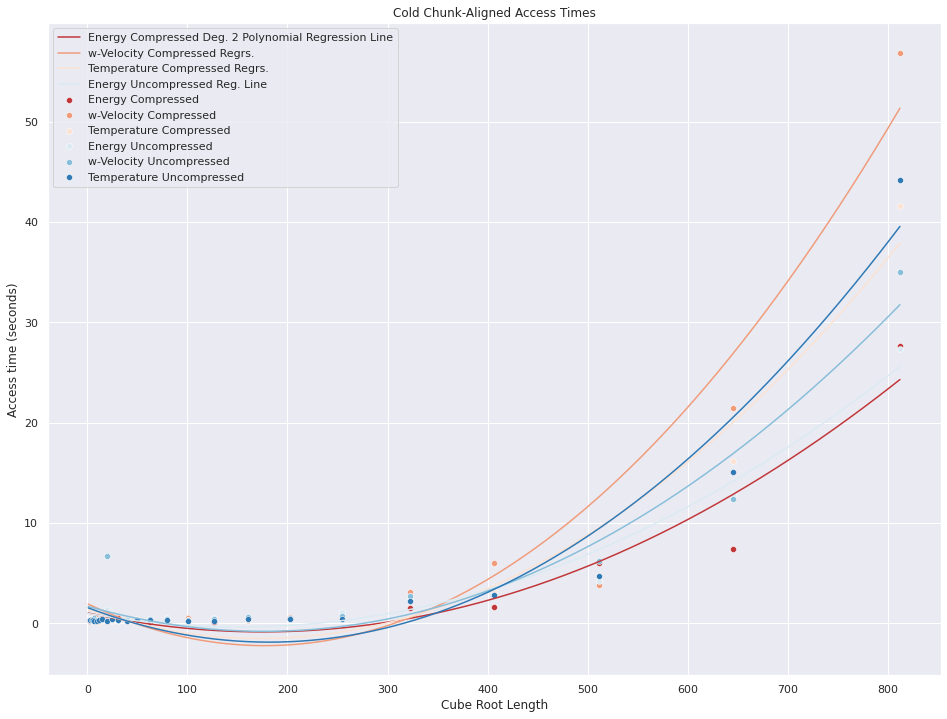

In [24]:
import seaborn as sns
sns.set(rc={'figure.figsize':(16,12)})

# Energy compressed
var = np.array(mcc_e) / 1000


# Diverging Palettes - https://www.codecademy.com/article/seaborn-design-ii
sns.set_palette("RdBu")

ax = sns.scatterplot(x=cube_root_size, y=var, label="Energy Compressed").set(xlabel='Cube Root Length', ylabel='Access time (seconds)')
#ax.set(xlabel='Cube Root Length', ylabel='Access time (ms)')

# https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
mymodel = np.poly1d(np.polyfit(cube_root_size, var, 2))
myline = np.linspace(1, cube_root_size[len(cube_root_size)-1], 1000)
plt.plot(myline, mymodel(myline), label="Energy Compressed Deg. 2 Polynomial Regression Line")#, color="orange")

# w-velocity compressed
var = np.array(mcc_w) / 1000

ax = sns.scatterplot(x=cube_root_size, y=var, label="w-Velocity Compressed")

mymodel_w = np.poly1d(np.polyfit(cube_root_size, var, 2))
myline_w = np.linspace(1, cube_root_size[len(cube_root_size)-1], 1000)
plt.plot(myline_w, mymodel_w(myline_w), label="w-Velocity Compressed Regrs.")


# Temperature compressed
var = np.array(mcc_t) / 1000

ax = sns.scatterplot(x=cube_root_size, y=var, label="Temperature Compressed")

mymodel_t = np.poly1d(np.polyfit(cube_root_size, var, 2))
myline_t = np.linspace(1, cube_root_size[len(cube_root_size)-1], 1000)
plt.plot(myline_t, mymodel_t(myline_t), label="Temperature Compressed Regrs.")


# sns.set_palette("dark") # This has no effect for some reason


# Energy Uncompressed
var = np.array(mcu_e) / 1000
ax = sns.scatterplot(x=cube_root_size, y=var, label="Energy Uncompressed", palette=["red"])
#ax.set(xlabel='Cube Root Length', ylabel='Access time (ms)')

mymodel = np.poly1d(np.polyfit(cube_root_size, var, 2))
myline = np.linspace(1, cube_root_size[len(cube_root_size)-1], 1000)
plt.plot(myline, mymodel(myline), label="Energy Uncompressed Reg. Line")#, color="orange")

# w-velocity Uncompressed
var = np.array(mcu_w) / 1000
ax = sns.scatterplot(x=cube_root_size, y=var, label="w-Velocity Uncompressed", palette=['dark'])

mymodel_w = np.poly1d(np.polyfit(cube_root_size, var, 2))
myline_w = np.linspace(1, cube_root_size[len(cube_root_size)-1], 1000)
plt.plot(myline_w, mymodel_w(myline_w))


# Temperature Uncompressed
var = np.array(mcu_t) / 1000
ax = sns.scatterplot(x=cube_root_size, y=var, label="Temperature Uncompressed")

mymodel_t = np.poly1d(np.polyfit(cube_root_size, var, 2))
myline_t = np.linspace(1, cube_root_size[len(cube_root_size)-1], 1000)
plt.plot(myline_t, mymodel_t(myline_t))


plt.title("Cold Chunk-Aligned Access Times")
plt.show()

#### 2048 with confidence intervals

In [84]:
import pandas as pd

In [88]:
# a = pd.DataFrame(np.vstack((np.array(cube_root_size), mcc_t)).T).set_index(0)
a = pd.DataFrame(np.vstack((np.tile(cube_root_size, 2), mcc_t.flatten()))).T
a = a.rename(columns={0: "Cube Root Length", 1: "Runtime (ms)"})

a.head()

,Cube Root Length,Runtime (ms)
0,3,283
1,5,235
2,6,630
3,7,315
4,10,171


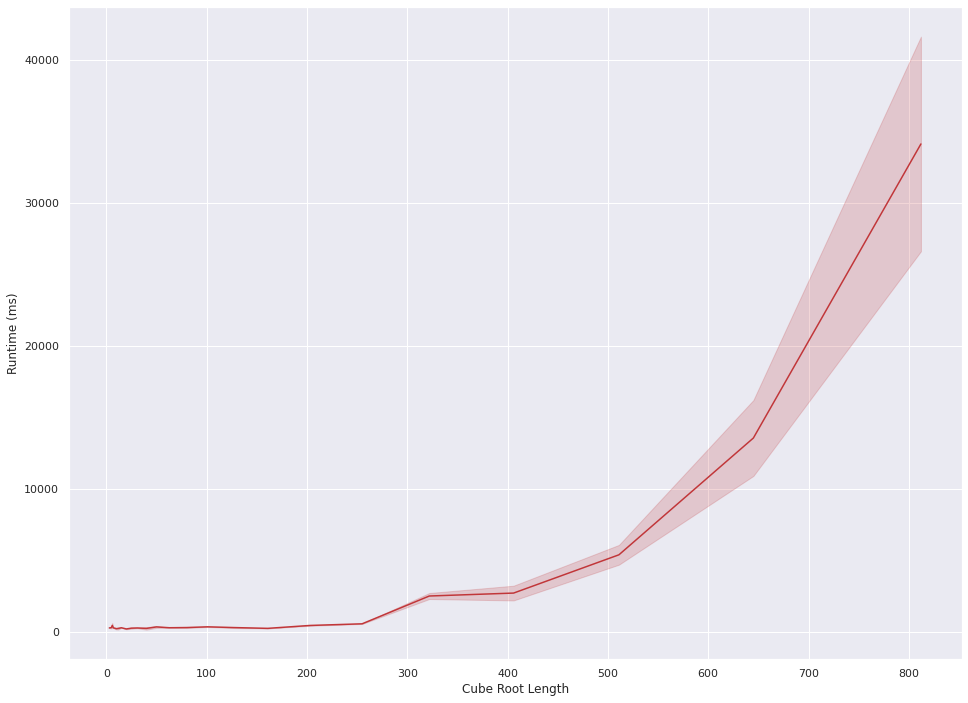

In [83]:
sns.lineplot( x = "Cube Root Length",
             y = "Runtime (ms)",
             data = a);

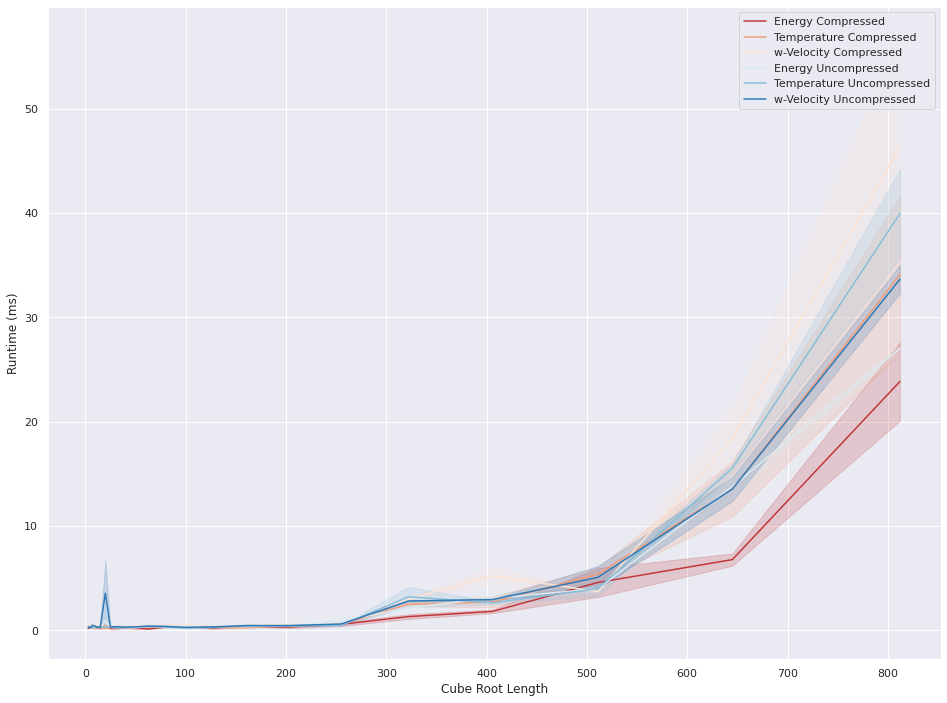

In [92]:
import seaborn as sns
sns.set(rc={'figure.figsize':(16,12)})

# Diverging Palettes - https://www.codecademy.com/article/seaborn-design-ii
sns.set_palette("RdBu")


# Energy compressed
var = np.array(mcc_e) / 1000

a = pd.DataFrame(np.vstack((np.tile(cube_root_size, 2), var.flatten()))).T
a = a.rename(columns={0: "Cube Root Length", 1: "Runtime (ms)"})

sns.lineplot( x = "Cube Root Length",
             y = "Runtime (ms)",
             data = a,
            label="Energy Compressed");


# Temperature compressed
var = np.array(mcc_t) / 1000

a = pd.DataFrame(np.vstack((np.tile(cube_root_size, 2), var.flatten()))).T
a = a.rename(columns={0: "Cube Root Length", 1: "Runtime (ms)"})

sns.lineplot( x = "Cube Root Length",
             y = "Runtime (ms)",
             data = a,
            label="Temperature Compressed");


# w-Velocity compressed
var = np.array(mcc_w) / 1000


a = pd.DataFrame(np.vstack((np.tile(cube_root_size, 2), var.flatten()))).T
a = a.rename(columns={0: "Cube Root Length", 1: "Runtime (ms)"})

sns.lineplot( x = "Cube Root Length",
             y = "Runtime (ms)",
             data = a,
            label="w-Velocity Compressed");


# Uncompressed

# Energy
var = np.array(mcu_e) / 1000

a = pd.DataFrame(np.vstack((np.tile(cube_root_size, 2), var.flatten()))).T
a = a.rename(columns={0: "Cube Root Length", 1: "Runtime (ms)"})

sns.lineplot( x = "Cube Root Length",
             y = "Runtime (ms)",
             data = a,
            label="Energy Uncompressed");


# Temperature
var = np.array(mcu_t) / 1000

a = pd.DataFrame(np.vstack((np.tile(cube_root_size, 2), var.flatten()))).T
a = a.rename(columns={0: "Cube Root Length", 1: "Runtime (ms)"})

sns.lineplot( x = "Cube Root Length",
             y = "Runtime (ms)",
             data = a,
            label="Temperature Uncompressed");


# w-Velocity
var = np.array(mcu_w) / 1000


a = pd.DataFrame(np.vstack((np.tile(cube_root_size, 2), var.flatten()))).T
a = a.rename(columns={0: "Cube Root Length", 1: "Runtime (ms)"})

sns.lineplot( x = "Cube Root Length",
             y = "Runtime (ms)",
             data = a,
            label="w-Velocity Uncompressed");

Plotting these all together looks horrible

### Plotting Each Variable Above Separately

#### Energy

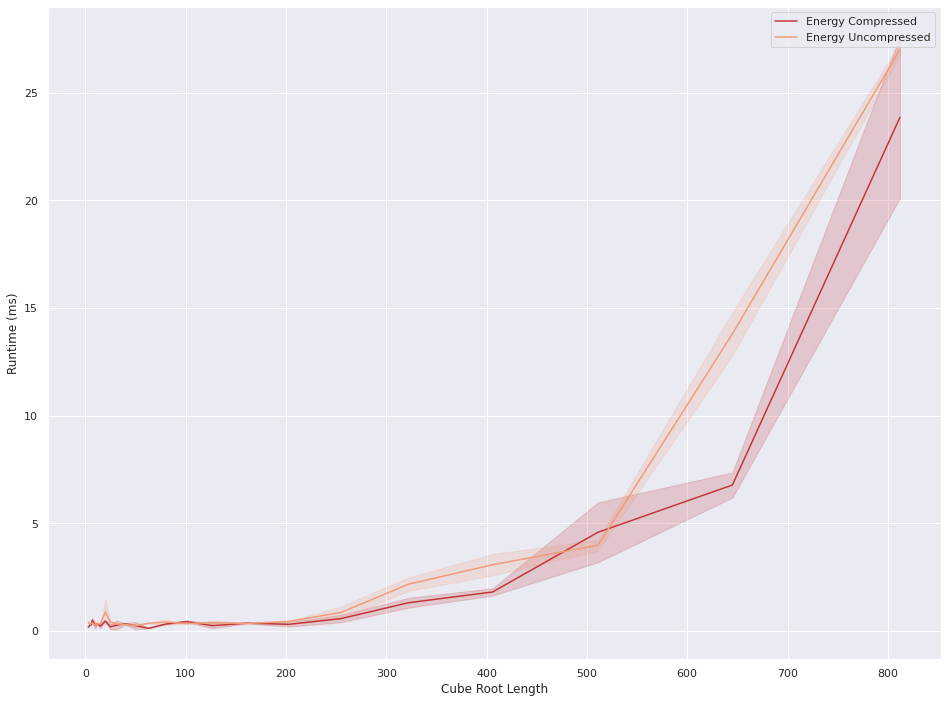

In [93]:
# Energy compressed
var = np.array(mcc_e) / 1000

a = pd.DataFrame(np.vstack((np.tile(cube_root_size, 2), var.flatten()))).T
a = a.rename(columns={0: "Cube Root Length", 1: "Runtime (ms)"})

sns.lineplot( x = "Cube Root Length",
             y = "Runtime (ms)",
             data = a,
            label="Energy Compressed");


# Energy Uncompressed
var = np.array(mcu_e) / 1000

a = pd.DataFrame(np.vstack((np.tile(cube_root_size, 2), var.flatten()))).T
a = a.rename(columns={0: "Cube Root Length", 1: "Runtime (ms)"})

sns.lineplot( x = "Cube Root Length",
             y = "Runtime (ms)",
             data = a,
            label="Energy Uncompressed");

#### Temperature

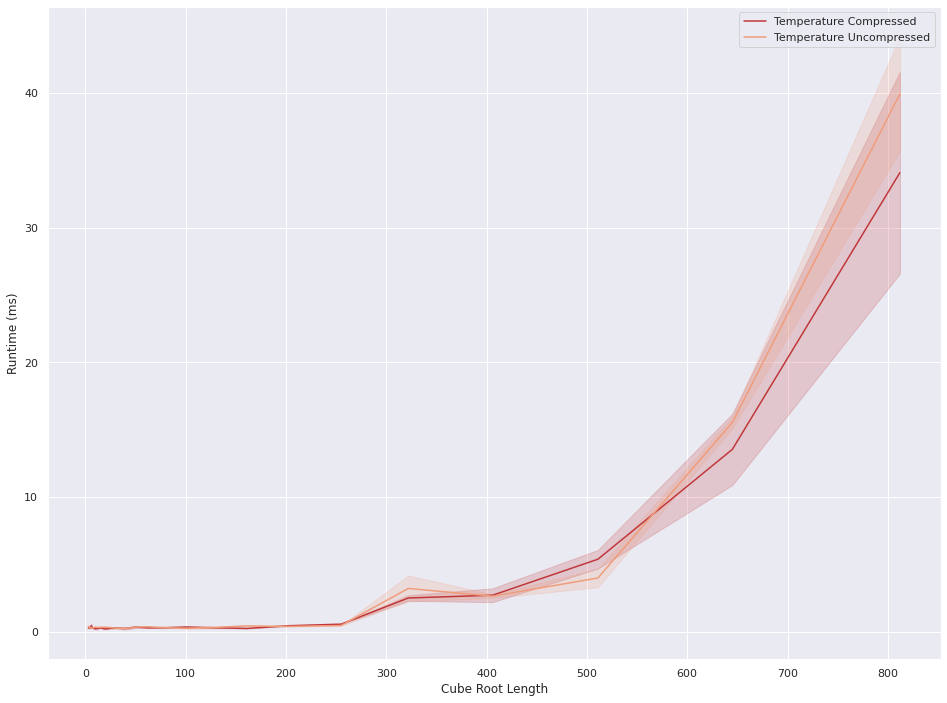

In [94]:
# compressed
var = np.array(mcc_t) / 1000

a = pd.DataFrame(np.vstack((np.tile(cube_root_size, 2), var.flatten()))).T
a = a.rename(columns={0: "Cube Root Length", 1: "Runtime (ms)"})

sns.lineplot( x = "Cube Root Length",
             y = "Runtime (ms)",
             data = a,
            label="Temperature Compressed");


# Uncompressed
var = np.array(mcu_t) / 1000

a = pd.DataFrame(np.vstack((np.tile(cube_root_size, 2), var.flatten()))).T
a = a.rename(columns={0: "Cube Root Length", 1: "Runtime (ms)"})

sns.lineplot( x = "Cube Root Length",
             y = "Runtime (ms)",
             data = a,
            label="Temperature Uncompressed");

#### W-Velocity

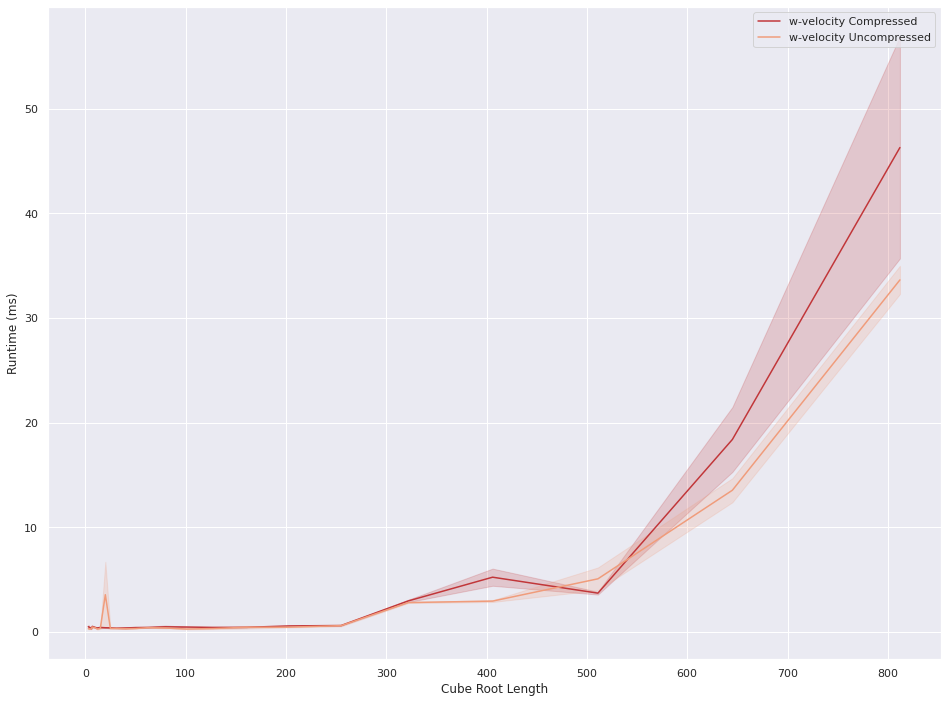

In [95]:
# compressed
var = np.array(mcc_w) / 1000

a = pd.DataFrame(np.vstack((np.tile(cube_root_size, 2), var.flatten()))).T
a = a.rename(columns={0: "Cube Root Length", 1: "Runtime (ms)"})

sns.lineplot( x = "Cube Root Length",
             y = "Runtime (ms)",
             data = a,
            label="w-velocity Compressed");


# Uncompressed
var = np.array(mcu_w) / 1000

a = pd.DataFrame(np.vstack((np.tile(cube_root_size, 2), var.flatten()))).T
a = a.rename(columns={0: "Cube Root Length", 1: "Runtime (ms)"})

sns.lineplot( x = "Cube Root Length",
             y = "Runtime (ms)",
             data = a,
            label="w-velocity Uncompressed");

#### 1024 times

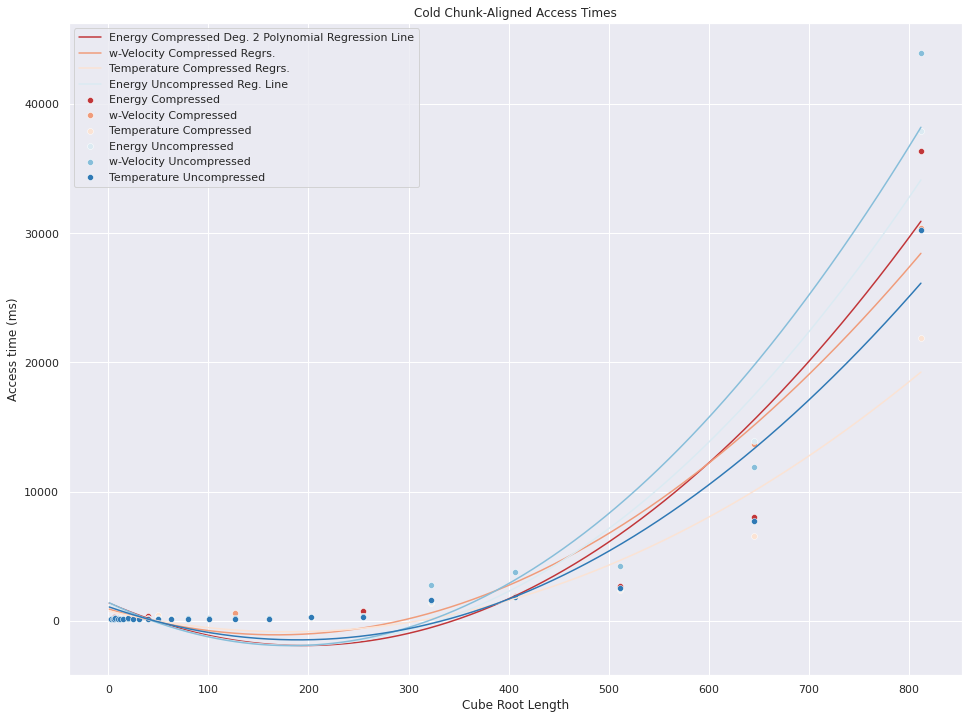

In [141]:
import seaborn as sns
sns.set(rc={'figure.figsize':(16,12)})

# Energy compressed
var = mcc_e


# Diverging Palettes - https://www.codecademy.com/article/seaborn-design-ii
sns.set_palette("RdBu")

ax = sns.scatterplot(x=cube_root_size, y=var, label="Energy Compressed").set(xlabel='Cube Root Length', ylabel='Access time (ms)')
#ax.set(xlabel='Cube Root Length', ylabel='Access time (ms)')

# https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
mymodel = np.poly1d(np.polyfit(cube_root_size, var, 2))
myline = np.linspace(1, cube_root_size[len(cube_root_size)-1], 1000)
plt.plot(myline, mymodel(myline), label="Energy Compressed Deg. 2 Polynomial Regression Line")#, color="orange")

# w-velocity compressed
var = mcc_w

ax = sns.scatterplot(x=cube_root_size, y=var, label="w-Velocity Compressed")

mymodel_w = np.poly1d(np.polyfit(cube_root_size, var, 2))
myline_w = np.linspace(1, cube_root_size[len(cube_root_size)-1], 1000)
plt.plot(myline_w, mymodel_w(myline_w), label="w-Velocity Compressed Regrs.")


# Temperature compressed
var = mcc_t

ax = sns.scatterplot(x=cube_root_size, y=var, label="Temperature Compressed")

mymodel_t = np.poly1d(np.polyfit(cube_root_size, var, 2))
myline_t = np.linspace(1, cube_root_size[len(cube_root_size)-1], 1000)
plt.plot(myline_t, mymodel_t(myline_t), label="Temperature Compressed Regrs.")


# sns.set_palette("dark") # This has no effect for some reason


# Energy Uncompressed
var = mcu_e
ax = sns.scatterplot(x=cube_root_size, y=var, label="Energy Uncompressed", palette=["red"])
#ax.set(xlabel='Cube Root Length', ylabel='Access time (ms)')

mymodel = np.poly1d(np.polyfit(cube_root_size, var, 2))
myline = np.linspace(1, cube_root_size[len(cube_root_size)-1], 1000)
plt.plot(myline, mymodel(myline), label="Energy Uncompressed Reg. Line")#, color="orange")

# w-velocity Uncompressed
var = mcu_w
ax = sns.scatterplot(x=cube_root_size, y=var, label="w-Velocity Uncompressed", palette=['dark'])

mymodel_w = np.poly1d(np.polyfit(cube_root_size, var, 2))
myline_w = np.linspace(1, cube_root_size[len(cube_root_size)-1], 1000)
plt.plot(myline_w, mymodel_w(myline_w))


# Temperature Uncompressed
var = mcu_t
ax = sns.scatterplot(x=cube_root_size, y=var, label="Temperature Uncompressed")

mymodel_t = np.poly1d(np.polyfit(cube_root_size, var, 2))
myline_t = np.linspace(1, cube_root_size[len(cube_root_size)-1], 1000)
plt.plot(myline_t, mymodel_t(myline_t))


plt.title("Cold Chunk-Aligned Access Times")
plt.show()

## Warm-cache access all chunk sizes 2^6 - 2^30

In [ ]:
for i in range(len(cube_root_size)):
#     _ = ncar_data['t'][0:2048,0:2048,0:2048]
    print(cube_root_size[i])
    %timeit -o ncar_data['e'][0:cube_root_size[i],0:cube_root_size[i],0:cube_root_size[i]]

In [ ]:
for i in range(len(cube_root_size)):
#     _ = ncar_data['t'][0:2048,0:2048,0:2048]
    print(cube_root_size[i])
    %timeit -o ncar_data['w'][0:cube_root_size[i],0:cube_root_size[i],0:cube_root_size[i]]

In [ ]:
for i in range(len(cube_root_size)):
#     _ = ncar_data['t'][0:2048,0:2048,0:2048]
    print(cube_root_size[i])
    %timeit -o ncar_data['t'][0:cube_root_size[i],0:cube_root_size[i],0:cube_root_size[i]]

# <font color="red">Uncompressed</font>

In [ ]:
ncar_e_uncompressed = zarr.open("ncar_zarr_uncompressed/e")
ncar_e_uncompressed.info

## Cold-cache access all chunk sizes 2^6 - 2^30